# Libraries

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.6.1)


In [0]:
! pip install eli5

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sys import stdout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from pylab import rcParams

from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier

import eli5
from eli5.sklearn import PermutationImportance

from matplotlib.colors import LogNorm

import operator
from imblearn.over_sampling import SMOTE

In [0]:
############### ACCURACY ################

def accuracy(pred, true):
    accuracy_value = 0
    for i in range(len(pred)):
        if true[i] == pred[i]:
            accuracy_value += 1
    return accuracy_value

# Data import and preprocessing

In [0]:
###############Data Loading################

### Original data
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/train.csv")

In [0]:
data.duplicated().sum()

2323

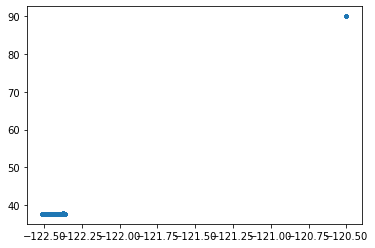

In [0]:
# Plot (Outlier)
plt.plot(data['X'],data['Y'],'.')
plt.show()

In [0]:
#Outlier Count
len(data[data['Y'] > 70])

67

In [0]:
data[data['Y'] > 70].sample(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
772431,2004-05-28 18:00:00,VEHICLE THEFT,"VEHICLE, RECOVERED, OTHER VEHICLE",Friday,SOUTHERN,NONE,BRYANT ST / SPEAR ST,-120.5,90.0
789255,2004-03-15 15:30:00,ASSAULT,BATTERY,Monday,INGLESIDE,JUVENILE BOOKED,PERSIA AV / LA GRANDE AV,-120.5,90.0
833921,2003-08-06 12:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.5,90.0
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0


In [0]:
data.drop_duplicates(inplace=True)
data.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)

## # of Incidents for each category

In [0]:
groups = data.groupby('Category')
crime_count = {}
for name, group in groups:
    crime_count[name] = len(group)
crime_count_list = sorted(crime_count.items(), key=operator.itemgetter(1) )
for i in range(len(crime_count_list)):
    print(crime_count_list[i][0], ':', crime_count_list[i][1])

TREA : 6
PORNOGRAPHY/OBSCENE MAT : 22
GAMBLING : 146
SEX OFFENSES NON FORCIBLE : 148
EXTORTION : 256
BRIBERY : 289
BAD CHECKS : 406
FAMILY OFFENSES : 488
SUICIDE : 508
EMBEZZLEMENT : 1164
LOITERING : 1207
ARSON : 1512
RUNAWAY : 1894
LIQUOR LAWS : 1899
DRIVING UNDER THE INFLUENCE : 2268
KIDNAPPING : 2340
RECOVERED VEHICLE : 3132
DRUNKENNESS : 4277
DISORDERLY CONDUCT : 4313
SEX OFFENSES FORCIBLE : 4380
STOLEN PROPERTY : 4537
TRESPASS : 7318
PROSTITUTION : 7446
WEAPON LAWS : 8550
SECONDARY CODES : 9979
FORGERY/COUNTERFEITING : 10592
FRAUD : 16637
ROBBERY : 22988
MISSING PERSON : 25669
SUSPICIOUS OCC : 31394
BURGLARY : 36600
WARRANTS : 42145
VANDALISM : 44581
VEHICLE THEFT : 53706
DRUG/NARCOTIC : 53919
ASSAULT : 76815
NON-CRIMINAL : 91915
OTHER OFFENSES : 125960
LARCENY/THEFT : 174320


In [0]:
data = data[data.Category != 'TREA']

In [0]:
#replace missing values, encoded as np.nan, using the mean value of the columns (axis 0) that contain the missing values:
#imp = Imputer(strategy='mean')
imp = SimpleImputer(strategy='mean', missing_values=np.NaN)


for district in data['PdDistrict'].unique():
    data.loc[data['PdDistrict'] == district, ['X', 'Y']] = imp.fit_transform(
        data.loc[data['PdDistrict'] == district, ['X', 'Y']])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [0]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


# Data Encoding

In [0]:
###############Data Encoding################

#MultiColumnLabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using LabelEncoder(). 
        If no columns specified, transforms all columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


#Datetime split    
Year, Month, Day, Hour, Minute = [], [], [], [], []
for i in range(len(data)):
    Year.append(data['Dates'].values[i][0:4])
    Month.append(data['Dates'].values[i][5:7])
    Day.append(data['Dates'].values[i][8:10])
    Hour.append(data['Dates'].values[i][11:13])
    Minute.append(data['Dates'].values[i][14:16])
data['Year'] = np.copy(np.array(Year))
data['Month'] = np.copy(np.array(Month))
data['Day'] = np.copy(np.array(Day))
data['Hour'] = np.copy(np.array(Hour))
data['Minute'] = np.copy(np.array(Minute))
data['Block'] = data['Address'].str.contains('block', case=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [0]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minute,Block
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,23,53,False
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,23,53,False
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,05,13,23,33,False
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,05,13,23,30,True
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,05,13,23,30,True


In [0]:
#Season
def get_season(x):
    season=''
    if (x in ['02', '03', '04']):
        season='spring'
    if (x in ['05', '06', '07']):
        season='summer'
    if (x in ['08', '09', '10']):
        season='fall'
    if (x in ['11', '12', '01']):
        season='winter'
    return season

data['Month'].apply(get_season)

0         summer
1         summer
2         summer
3         summer
4         summer
           ...  
878044    winter
878045    winter
878046    winter
878047    winter
878048    winter
Name: Month, Length: 875720, dtype: object

In [0]:
data['Season'] = np.copy(data['Month'].apply(get_season))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Year           object
Month          object
Day            object
Hour           object
Minute         object
Block            bool
Season         object
dtype: object

In [0]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minute,Block,Season
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,23,53,False,summer
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,23,53,False,summer
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,05,13,23,33,False,summer
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,05,13,23,30,True,summer
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,05,13,23,30,True,summer


In [0]:
#LabelEncoder() : categorical variable to numerical
#fit_transform(self, y) : Fit label encoder and return encoded labels
col_data = MultiColumnLabelEncoder(columns=['Year', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek', 'PdDistrict', 'Category', 'Season', 'X', 'Y']).fit_transform(data)

#drop the column(axis=1) with label 'Category'
x = col_data.drop('Category', axis=1)
x = x.drop('Dates', axis=1)
x = x.drop('Descript', axis=1)
x = x.drop('Resolution', axis=1)
x = x.drop('Address', axis=1)

y = col_data['Category']

## Plots

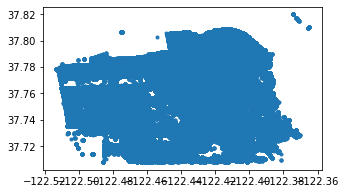

In [0]:
# Plot
rcParams['figure.figsize'] = 5, 3
plt.plot(data['X'],data['Y'],'.')
plt.show()

### Plots for each crime label

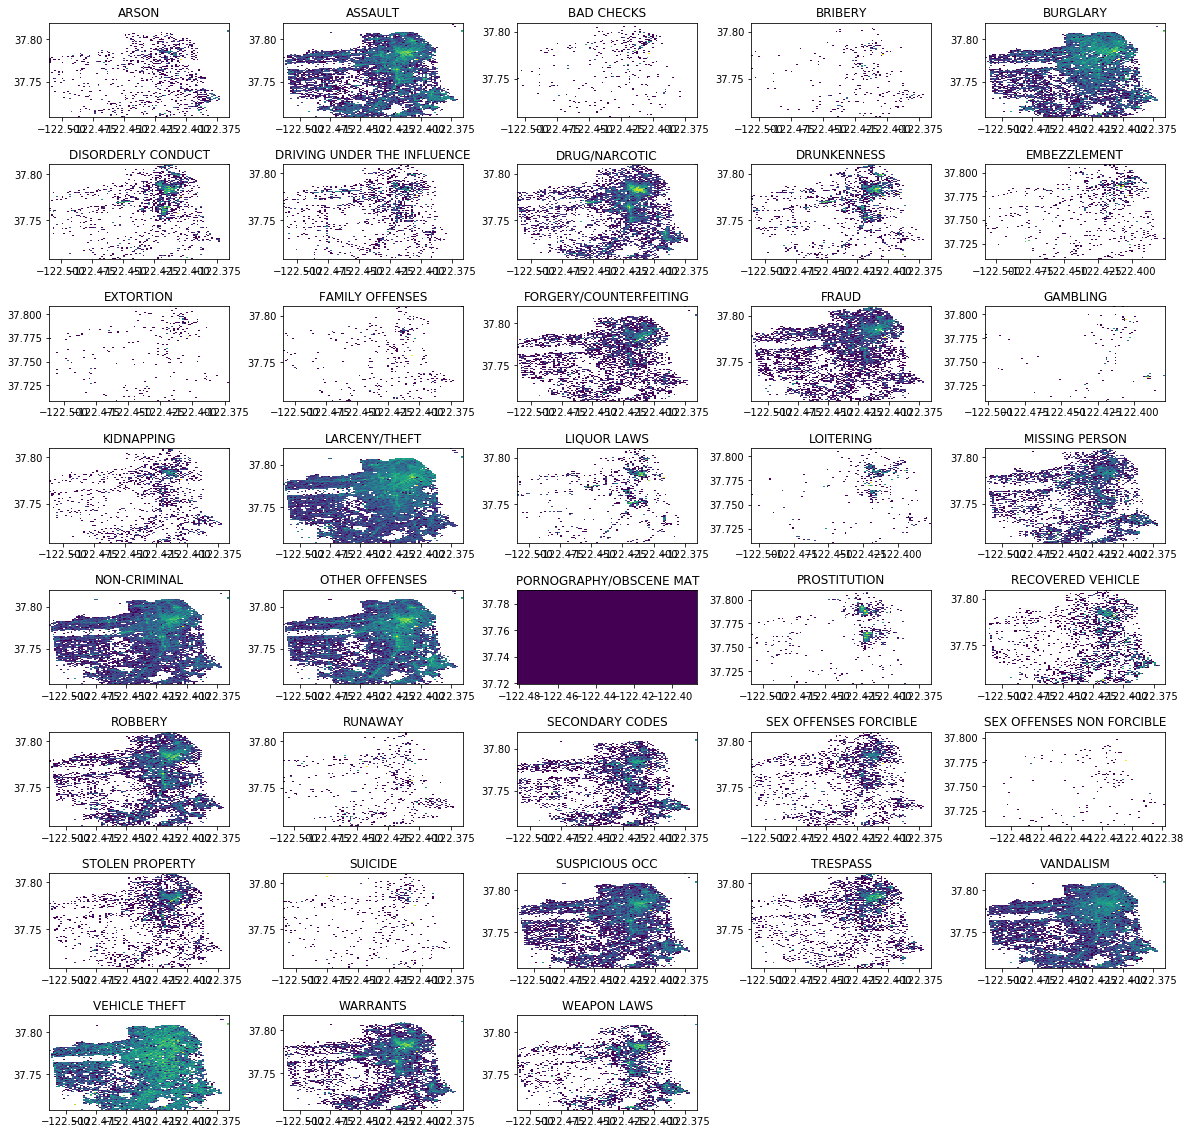

In [0]:
NX=100
NY=100
groups = data.groupby('Category')
ii=1
plt.figure(figsize=(20, 20))

for name, group in groups:
    plt.subplot(8,5,ii)
    histo, xedges, yedges = np.histogram2d(np.array(group.X),np.array(group.Y), bins=(NX,NY))
    myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
    plt.imshow(histo.T,origin='low',extent=myextent,interpolation='nearest',aspect='auto',norm=LogNorm())
    plt.title(name)
    plt.xlabel

#     plt.figure(ii)
#     plt.plot(group.X,group.Y,'.')
    ii+=1
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

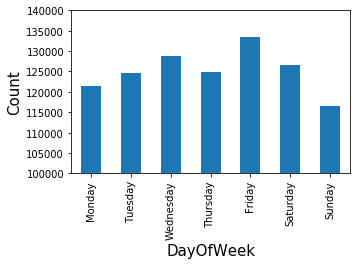

In [0]:
dowcount = data['DayOfWeek'].value_counts()
pd.DataFrame(dowcount).reindex(['Monday','Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']).plot.bar(legend = False)
plt.xlabel('DayOfWeek', size = 15)
plt.ylabel('Count', size = 15)
plt.ylim((100000,140000))
plt.show()

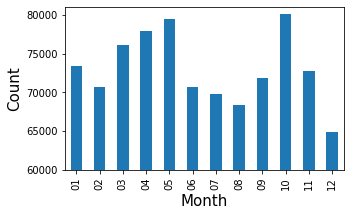

In [0]:
monthcount = data['Month'].value_counts().sort_index()
pd.DataFrame(monthcount).plot.bar(legend = False)
plt.xlabel('Month', size = 15)
plt.ylabel('Count', size = 15)
plt.ylim((60000,81000))
plt.show()

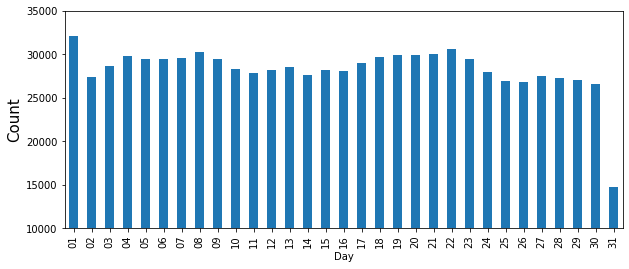

In [0]:
rcParams['figure.figsize'] = 10, 4
daycount = data['Day'].value_counts().sort_index()
pd.DataFrame(daycount).plot.bar(legend = False)
plt.xlabel('Day')
plt.ylabel('Count', size = 15)
plt.ylim((10000,35000))
plt.show()

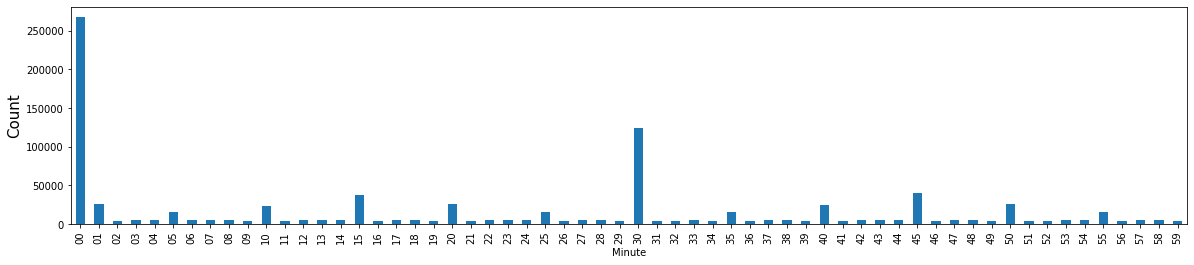

In [0]:
rcParams['figure.figsize'] = 20, 4
mincount = data['Minute'].value_counts().sort_index()
pd.DataFrame(mincount).plot.bar(legend = False)
plt.xlabel('Minute')
plt.ylabel('Count', size = 15)
plt.show()

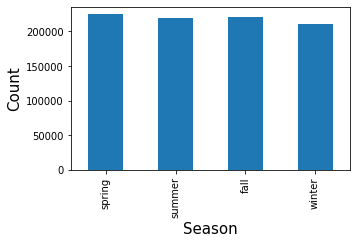

In [0]:
rcParams['figure.figsize'] = 5, 3
dowcount = data['Season'].value_counts()
pd.DataFrame(dowcount).reindex(['spring','summer', 'fall','winter']).plot.bar(legend = False)
plt.xlabel('Season', size = 15)
plt.ylabel('Count', size = 15)
plt.show()

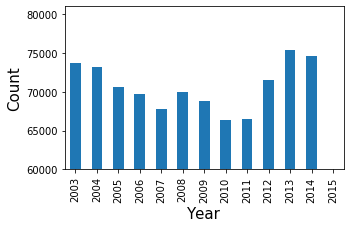

In [0]:
yearcount = data['Year'].value_counts().sort_index()
pd.DataFrame(yearcount).plot.bar(legend = False)
plt.xlabel('Year', size = 15)
plt.ylabel('Count', size = 15)
plt.ylim((60000,81000))
plt.show()

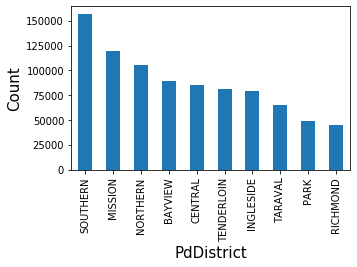

In [0]:
PdDistrictcount = data['PdDistrict'].value_counts()
pd.DataFrame(PdDistrictcount).plot.bar(legend = False)
plt.xlabel('PdDistrict', size = 15)
plt.ylabel('Count', size = 15)
plt.show()

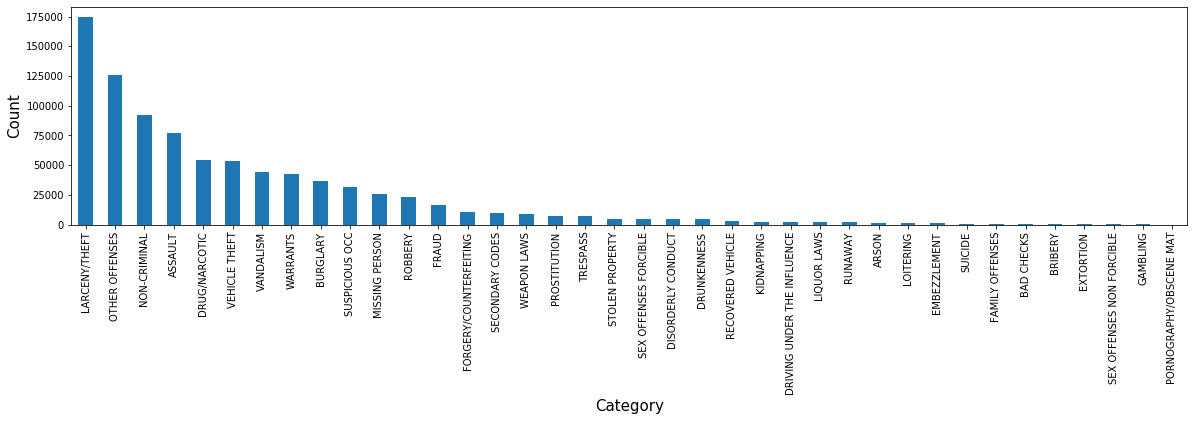

In [0]:
rcParams['figure.figsize'] = 20, 4
categorycount = data['Category'].value_counts()
pd.DataFrame(categorycount).plot.bar(legend = False)
plt.xlabel('Category', size = 15)
plt.ylabel('Count', size = 15)
plt.show()
rcParams['figure.figsize'] = 6, 4

# Data Split

In [0]:
###############Data Splitting################

# training and test set creation

# sklearn.model_selection.train_test_split(*arrays, **options): Split arrays or matrices into random train and test subsets
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.8, test_size = 0.2)

In [0]:
print(x_train.shape, y_train.shape)

(700576, 11) (700576,)


In [0]:
from imblearn.over_sampling import SMOTE

smote = SMOTE('minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
print(x_train_sm.shape, y_train_sm.shape)

(840017, 11) (840017,)


# -------------- Methods --------------

# Linear Discriminant Analysis

In [0]:
model = LinearDiscriminantAnalysis(solver='svd').fit(x_train_sm, y_train_sm)
perm = PermutationImportance(model).fit(x_test, y_test)
eli5.show_weights(perm, feature_names=x_test.columns.tolist())

Weight,Feature
0.0149 ± 0.0009,Y
0.0149 ± 0.0005,Block
0.0144 ± 0.0003,Minute
0.0057 ± 0.0010,Hour
0.0047 ± 0.0004,Year
0.0028 ± 0.0004,PdDistrict
0.0019 ± 0.0005,Season
0.0011 ± 0.0008,X
0.0003 ± 0.0006,Month
0.0002 ± 0.0002,Day


[0.27794907 0.27625862 0.27656814 0.27546101 0.27461578 0.27585386
 0.2751872  0.27463959 0.27598481 0.27649671 0.27554434 0.27625862
 0.27627052 0.27774669 0.27593719 0.27631814 0.27479435 0.27642528
 0.27427054 0.27562767 0.27516339 0.27630623 0.27553243 0.27552053
 0.27691337 0.27796098 0.27578243 0.27462768 0.27523482 0.27560386
 0.27702051 0.27491339 0.27509196 0.27625862 0.27396102 0.27606814
 0.27748479 0.27667528 0.27484197 0.27688956 0.27566338 0.27603243
 0.27833002 0.27359198 0.27683004 0.27431816 0.27562767 0.27655623
 0.27455626 0.2772586 ]


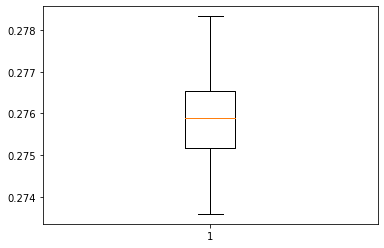

In [0]:
###############Linear Discriminant Analysis################

# features = ["DayOfWeek", "PdDistrict",  "Year", "Month", "Day", "Hour"]
# x_train_f = x_train_sm[features]

accuracy_lda = []
log_loss_lda = []

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)
    
x_train_lda = x_train_sm.reset_index(drop=True)
y_train_lda = y_train_sm.reset_index(drop=True)


for train_idx, test_idx in rkf.split(x_train_lda, y_train_lda):
    
    x_train_data_lda, x_test_data_lda = x_train_lda.loc[train_idx], x_train_lda.loc[test_idx]
    y_train_data_lda, y_test_data_lda = y_train_lda.loc[train_idx], y_train_lda.loc[test_idx]
    
    x_train_data_lda = x_train_data_lda.dropna()
    y_train_data_lda = y_train_data_lda.dropna()
    x_test_data_lda = x_test_data_lda.dropna()
    y_test_data_lda = y_test_data_lda.dropna()
        
    # Linear Discriminant Analysis : A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes' rule.
    # solver='svd’: Singular value decomposition. Does not compute the covariance matrix, recommended for data with a large number of features.
    lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=False)
    lda.fit(x_train_data_lda, y_train_data_lda)
    
    accuracy_lda.append(accuracy(lda.predict(x_test_data_lda), y_test_data_lda.values))
    log_loss_lda.append(log_loss(y_test_data_lda, lda.predict_proba(x_test_data_lda)) )

accuracy_lda = np.array(accuracy_lda)/len(x_test_data_lda)
print(accuracy_lda)
plt.boxplot(accuracy_lda)
plt.show()

[2.511706419289918, 2.513489424274861, 2.511161877473236, 2.512963985119234, 2.5143786778594595, 2.5090283289974784, 2.5131034194516872, 2.5146580332955226, 2.5148480815401437, 2.5130928691436463, 2.5121932534653166, 2.5092777327376092, 2.51216967937068, 2.5130472760078395, 2.5123906181234075, 2.511529955778053, 2.512945339201094, 2.5161188977548328, 2.5145011087946956, 2.5142903419541365, 2.513558812988781, 2.512407985411773, 2.514753762141644, 2.5124413168687, 2.5100582087063477, 2.509795120896027, 2.5133175443679834, 2.51278621717366, 2.5157504775822797, 2.5135162609046593, 2.5132285703073394, 2.512986410536614, 2.514189037729404, 2.5126549274749563, 2.513829737955877, 2.5143342082142817, 2.5076664014832204, 2.5150985260628995, 2.5132843776974587, 2.511129739055601, 2.5133012205950824, 2.5151484146055045, 2.5099911077878128, 2.5133665995868357, 2.5104216853504417, 2.515321624672075, 2.5127992297066037, 2.512325423424143, 2.5137190477436397, 2.511912979749843]


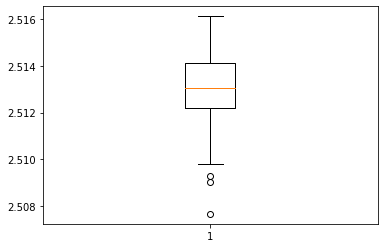

In [0]:
print(log_loss_lda)
plt.boxplot(log_loss_lda)
plt.show()

In [0]:
accuracy(lda.predict(x_test), y_test.values)

29955

In [0]:
log_loss(y_test, lda.predict_proba(x_test))

2.721893238398097

# KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5).fit(x_train_sm, y_train_sm)
perm = PermutationImportance(model).fit(x_test, y_test)
eli5.show_weights(perm, feature_names=x_test.columns.tolist())

Weight,Feature
0.1395 ± 0.0018,Y
0.1334 ± 0.0012,X
0.0239 ± 0.0010,Minute
0.0114 ± 0.0011,Hour
0.0052 ± 0.0012,Day
0.0051 ± 0.0007,Year
0.0016 ± 0.0007,Month
0.0005 ± 0.0006,DayOfWeek
0.0000 ± 0.0001,PdDistrict
-0.0000 ± 0.0001,Block


[0.37420983 0.37430507 0.37191224 0.3736027  0.37230509 0.37304318
 0.37400745 0.37185272 0.37374555 0.37405507 0.37340032 0.37224557
 0.37278128 0.37581695 0.37337651 0.37131701 0.37305508 0.37270985
 0.37356698 0.37299556 0.3728527  0.37224557 0.37397174 0.37200748
 0.37235271 0.37487649 0.37529315 0.37184081 0.37251937 0.37190033
 0.3733527  0.37345984 0.37262652 0.37224557 0.37384079 0.37424554
 0.37022178 0.37400745 0.37384079 0.37528125 0.37391222 0.37236461
 0.3744003  0.37199557 0.372317   0.37170986 0.37306699 0.37353127
 0.37365031 0.37272175]


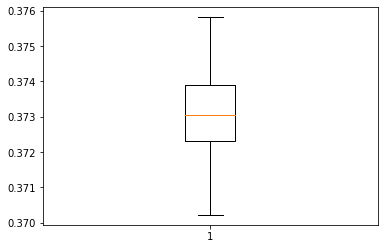

In [0]:
#from sklearn.neighbors import KNeighborsClassifier

accuracy_knn = []
log_loss_knn = []

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)

# x_train_knn = x_train_f.reset_index(drop=True)
# y_train_knn = y_train.reset_index(drop=True)
x_train_knn = x_train_sm.reset_index(drop=True)
y_train_knn = y_train_sm.reset_index(drop=True)

for train_idx, test_idx in rkf.split(x_train_knn, y_train_knn):
    x_train_data_knn, x_test_data_knn = x_train_knn.loc[train_idx], x_train_knn.loc[test_idx]
    y_train_data_knn, y_test_data_knn = y_train_knn.loc[train_idx], y_train_knn.loc[test_idx]
    
    x_train_data_knn = x_train_data_knn.dropna()
    y_train_data_knn = y_train_data_knn.dropna()
    x_test_data_knn = x_test_data_knn.dropna()
    y_test_data_knn = y_test_data_knn.dropna()

    knn = KNeighborsClassifier(n_neighbors=5)
    
    knn.fit(x_train_data_knn, y_train_data_knn)
    
    accuracy_knn.append(accuracy(knn.predict(x_test_data_knn), y_test_data_knn.values))
    log_loss_knn.append(log_loss(y_test_data_knn, knn.predict_proba(x_test_data_knn)))
    
accuracy_knn = np.array(accuracy_knn)/len(x_test_data_knn)
print(accuracy_knn)
plt.boxplot(accuracy_knn)
plt.show()

[13.793064173050158, 13.812910475091883, 13.828782316424338, 13.865993210726073, 13.827163647334215, 13.874961304855473, 13.844609773380213, 13.909992280582246, 13.870973608742503, 13.878340877599564, 13.84242020528402, 13.911361646197394, 13.898634345219131, 13.835787618768876, 13.844249243190585, 13.885057693898457, 13.815900125474643, 13.8964056298701, 13.807817653112057, 13.876095263148995, 13.85764285340116, 13.948043027148659, 13.855826832872609, 13.846458198866973, 13.821904472257438, 13.810279601660339, 13.845900587719452, 13.914157363555741, 13.88211436767468, 13.813736463724481, 13.855679733561681, 13.817988690128164, 13.933975133169957, 13.940305856618947, 13.807558412169705, 13.808963022972732, 13.886577802987615, 13.83930786297338, 13.868573579573942, 13.77539122058016, 13.813391836923497, 13.869498500886813, 13.859769293013178, 13.884551333676274, 13.814496583192152, 13.834432858762248, 13.805340147201038, 13.8752365702599, 13.827989232099949, 13.883871347955456]


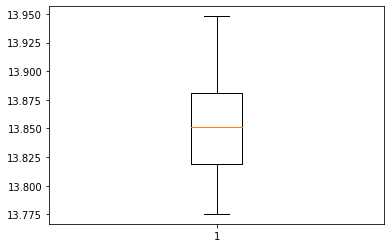

In [0]:
print(log_loss_knn)
plt.boxplot(log_loss_knn)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7fc764b80be0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc764b8f5c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc764b8ff98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc764b8fc50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc764b80ef0>,
  <matplotlib.lines.Line2D at 0x7fc764b8f278>]}

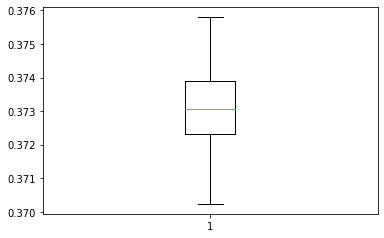

In [0]:
rcParams['figure.figsize'] = 6, 3.8
plt.boxplot(accuracy_knn)

{'boxes': [<matplotlib.lines.Line2D at 0x7fc764aea0b8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc764aeaa58>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc764af7470>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc764af7128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc764aea3c8>,
  <matplotlib.lines.Line2D at 0x7fc764aea710>]}

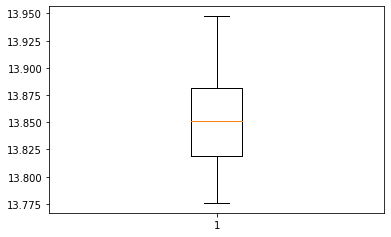

In [0]:
plt.boxplot(log_loss_knn)

In [0]:
accuracy(knn.predict(x_test), y_test.values)

43461

In [0]:
log_loss(y_test, knn.predict_proba(x_test))

16.636749742255592

# Naive Bayes

[0.29074654 0.29132987 0.29228223 0.29185367 0.28977036 0.29265128
 0.2929608  0.29131796 0.2916751  0.292187   0.29184176 0.28997274
 0.29356793 0.28979417 0.29198462 0.29191319 0.29125844 0.29144891
 0.29198462 0.29237747 0.29262747 0.29175843 0.29085368 0.29056797
 0.29148463 0.29043702 0.29172272 0.29188938 0.29107987 0.29355603
 0.29022274 0.2932227  0.29032988 0.29196081 0.29159177 0.29174653
 0.2919251  0.29466316 0.28944894 0.29124653 0.29204414 0.29165129
 0.29097273 0.29124653 0.29263937 0.28938941 0.29111558 0.29123463
 0.29247271 0.29356793]


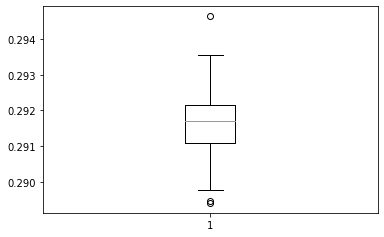

In [0]:
from sklearn.naive_bayes import GaussianNB

accuracy_gnb = []
log_loss_gnb = []

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)

x_train_gnb = x_train_sm.reset_index(drop=True)
y_train_gnb = y_train_sm.reset_index(drop=True)
# x_train_gnb = x_train.reset_index(drop=True)
# y_train_gnb = y_train.reset_index(drop=True)

for train_idx, test_idx in rkf.split(x_train_gnb, y_train_gnb):
    x_train_data_gnb, x_test_data_gnb = x_train_gnb.loc[train_idx], x_train_gnb.loc[test_idx]
    y_train_data_gnb, y_test_data_gnb = y_train_gnb.loc[train_idx], y_train_gnb.loc[test_idx]
    
    x_train_data_gnb = x_train_data_gnb.dropna()
    y_train_data_gnb = y_train_data_gnb.dropna()
    x_test_data_gnb = x_test_data_gnb.dropna()
    y_test_data_gnb = y_test_data_gnb.dropna()

    gnb = GaussianNB()
    
    gnb.fit(x_train_data_gnb, y_train_data_gnb)
    
    accuracy_gnb.append(accuracy(gnb.predict(x_test_data_gnb), y_test_data_gnb.values))
    log_loss_gnb.append(log_loss(y_test_data_gnb, gnb.predict_proba(x_test_data_gnb)))
    
accuracy_gnb = np.array(accuracy_gnb)/len(x_test_data_gnb)
print(accuracy_gnb)
plt.boxplot(accuracy_gnb)
plt.show()

[2.4276466318645964, 2.4260975315467, 2.4266107924042335, 2.429941968062842, 2.430601682679387, 2.4227355153521, 2.4262597288608583, 2.4269586659098734, 2.4336413299893653, 2.4272770691607706, 2.4291736734906726, 2.4342885136943297, 2.4315696569611873, 2.42940812071914, 2.4280600632914844, 2.425613959187774, 2.427421755112034, 2.4225650543693575, 2.4257335691019626, 2.423737888036114, 2.4263890418496086, 2.4241817171835702, 2.4246167385780697, 2.431818229684384, 2.429795640217251, 2.4323609921448908, 2.426984599583358, 2.4315295709289613, 2.423933258882264, 2.426185893683598, 2.429870712062384, 2.4236812673149717, 2.4279592691202385, 2.4249512740767045, 2.4297910029135696, 2.426841845244219, 2.4303352471828266, 2.425794391920306, 2.4325914600808978, 2.425620270368121, 2.4304868833030158, 2.4267064713343878, 2.4237472998042278, 2.428736104000592, 2.4246611266074587, 2.4342202219335594, 2.4307675652746257, 2.4260833800186745, 2.4256288002789574, 2.4267307538593292]


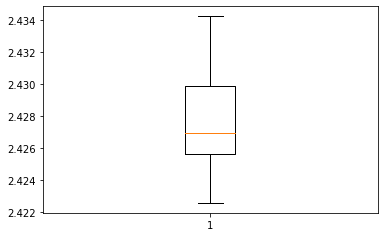

In [0]:
print(log_loss_gnb)
plt.boxplot(log_loss_gnb)
plt.show()

In [0]:
accuracy(gnb.predict(x_test), y_test.values)

32372

In [0]:
log_loss(y_test, gnb.predict_proba(x_test))

2.6878235684567136

# Neural Network

[0.16602183 0.25428269 0.23435435 0.25317556 0.16602183 0.17198605
 0.22140213 0.16606945 0.25627076 0.17617647 0.27959191 0.27250866
 0.16602183 0.19060487 0.26634207 0.28557993 0.22611636 0.24241378
 0.18314068 0.25246128 0.19470006 0.15747432 0.23341389 0.29277032
 0.19424769 0.31802002 0.2014976  0.26954441 0.20035476 0.17999786
 0.24597326 0.1875692  0.26646111 0.23700908 0.2107713  0.22305687
 0.2898775  0.26580636 0.29161558 0.23077106 0.25504458 0.17999786
 0.30361543 0.23923525 0.25543744 0.24722325 0.22125927 0.22178307
 0.24154474 0.26547303]


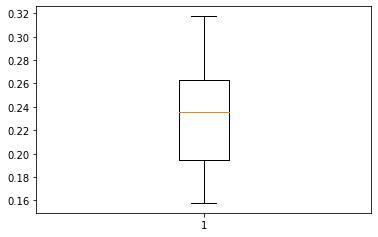

In [0]:
###############Neural Network################

accuracy_nrn = []
log_loss_nrn = []

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)

x_train_nrn = x_train_sm.reset_index(drop=True)
y_train_nrn = y_train_sm.reset_index(drop=True)
#x_train_nrn = x_train.reset_index(drop=True)
#y_train_nrn = y_train.reset_index(drop=True)

for train_idx, test_idx in rkf.split(x_train_nrn, y_train_nrn):
    x_train_data_nrn, x_test_data_nrn = x_train_nrn.loc[train_idx], x_train_nrn.loc[test_idx]
    y_train_data_nrn, y_test_data_nrn = y_train_nrn.loc[train_idx], y_train_nrn.loc[test_idx]
    
    x_train_data_nrn = x_train_data_nrn.dropna()
    y_train_data_nrn = y_train_data_nrn.dropna()
    x_test_data_nrn = x_test_data_nrn.dropna()
    y_test_data_nrn = y_test_data_nrn.dropna()
    
    # Multi-layer Perceptron classifier
    nrn = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,), random_state=1)
    
    nrn.fit(x_train_data_nrn, y_train_data_nrn)

    accuracy_nrn.append(accuracy(nrn.predict(x_test_data_nrn), y_test_data_nrn.values))
    log_loss_nrn.append(log_loss(y_test_data_nrn, nrn.predict_proba(x_test_data_nrn)) )

accuracy_nrn = np.array(accuracy_nrn)/len(x_test_data_nrn)
print(accuracy_nrn)
plt.boxplot(accuracy_nrn)
plt.show()

[2.685003313021183, 2.5499107812073145, 2.635749707408378, 2.581005624304706, 2.6851310746850254, 2.6859539364676484, 2.649660471406955, 2.685162958267008, 2.597274513653636, 2.649003200709059, 2.52617637819485, 2.5278143160535795, 2.685095615147478, 2.646135908729876, 2.556599427349344, 2.4828801404802734, 2.638750287000495, 2.6255772691024912, 2.681549374606799, 2.5711109134971832, 2.6339034885490746, 2.6729902018511043, 2.637252243351922, 2.533231566588052, 2.6915147102036228, 2.3839017948653813, 2.640703940295247, 2.5328470603889714, 2.6458174038636995, 2.651049790174693, 2.5985292725124816, 2.66023999429075, 2.585956633522084, 2.590827731201564, 2.64286914547691, 2.621930225025079, 2.509219283143255, 2.568619917752907, 2.52549441564996, 2.6041407134780914, 2.575645984109905, 2.657333204168831, 2.4660209379857605, 2.6341131143115253, 2.5850771685251845, 2.5403127595260826, 2.6426028861658315, 2.640468895849587, 2.6376204600497264, 2.5590230434440246]


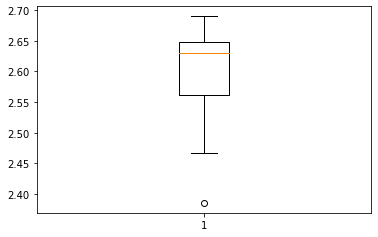

In [0]:
print(log_loss_nrn)
plt.boxplot(log_loss_nrn)
plt.show()

In [0]:
accuracy(nrn.predict(x_test), y_test.values)

21124

In [0]:
log_loss(y_test, nrn.predict_proba(x_test))

2.8190539804305255

# XGB

In [0]:
accuracy_xgb = []
log_loss_xgb = []

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)

#x_train_xgb = x_train.reset_index(drop=True)
#y_train_xgb = y_train.reset_index(drop=True)
x_train_xgb = x_train_sm.reset_index(drop=True)
y_train_xgb = y_train_sm.reset_index(drop=True)

for train_idx, test_idx in rkf.split(x_train_xgb, y_train_xgb):
    x_train_data_xgb, x_test_data_xgb = x_train_xgb.loc[train_idx], x_train_xgb.loc[test_idx]
    y_train_data_xgb, y_test_data_xgb = y_train_xgb.loc[train_idx], y_train_xgb.loc[test_idx]
    
    
    x_train_data_xgb = x_train_data_xgb.dropna()
    y_train_data_xgb = y_train_data_xgb.dropna()
    x_test_data_xgb = x_test_data_xgb.dropna()
    y_test_data_xgb = y_test_data_xgb.dropna()
        
    xgb = XGBClassifier(n_estimators = 20,
                      learning_rate = 0.2,
                      max_depth = 11,
                      min_child_weight=4,
                      gamma = 0.4,
                      reg_alpha = 0.05,
                      reg_lambda = 2,
                      subsample = 1.0,
                      colsample_bytree = 1.0,
                      max_delta_step = 1,
                      scale_pos_weight = 1,
                      objective = 'multi:softprob',
                      nthread = 8,
                      seed = 0
                      )
    xgb.fit(x_train_data_xgb, y_train_data_xgb)
    accuracy_xgb.append(accuracy(xgb.predict(x_test_data_xgb), y_test_data_xgb.values))
    log_loss_xgb.append(log_loss(y_test_data_xgb, xgb.predict_proba(x_test_data_xgb)) )
    
accuracy_xgb = np.array(accuracy_xgb)/len(x_test_data_xgb)
print(accuracy_xgb)
plt.boxplot(accuracy_xgb)

In [0]:
print(log_loss_xgb)
plt.boxplot(log_loss_xgb)
plt.show()

In [0]:
accuracy(xgb.predict(x_test), y_test.values)

In [0]:
log_loss(y_test, xgb.predict_proba(x_test))

# Bagged Forests

In [0]:
###############Bagged Forests################
### These models used 20 bagged CART trees.

accuracy_bgf = []
log_loss_bgf = []

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)

x_train_bgf = x_train_sm.reset_index(drop=True)
y_train_bgf = y_train_sm.reset_index(drop=True)

for train_idx, test_idx in rkf.split(x_train_bgf, y_train_bgf):
    x_train_data_bgf, x_test_data_bgf = x_train_bgf.loc[train_idx], x_train_bgf.loc[test_idx]
    y_train_data_bgf, y_test_data_bgf = y_train_bgf.loc[train_idx], y_train_bgf.loc[test_idx]
    
    x_train_data_bgf = x_train_data_bgf.dropna()
    y_train_data_bgf = y_train_data_bgf.dropna()
    x_test_data_bgf = x_test_data_bgf.dropna()
    y_test_data_bgf = y_test_data_bgf.dropna()
    
    bgf = BaggingClassifier(n_estimators=20)

    bgf.fit(x_train_data_bgf, y_train_data_bgf)
    
    accuracy_bgf.append(accuracy(bgf.predict(x_test_data_bgf), y_test_data_bgf.values))
    log_loss_bgf.append(log_loss(y_test_data_bgf, bgf.predict_proba(x_test_data_bgf)) )

accuracy_bgf = np.array(accuracy_bgf)/len(x_test_data_bgf)
print(accuracy_bgf)
plt.boxplot(accuracy_bgf)
plt.show()

In [0]:
print(log_loss_bgf)
plt.boxplot(log_loss_bgf)
plt.show()

In [0]:
accuracy(bgf.predict(x_test), y_test.values)

In [0]:
log_loss(y_test, bgf.predict_proba(x_test))

# Randm Forests

In [0]:
###############Random Forests################

log_loss_rdf = []
accuracy_rdf = []

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)

# x_train_rdf = x_train.reset_index(drop=True)
# y_train_rdf = y_train.reset_index(drop=True)
x_train_rdf = x_train_sm.reset_index(drop=True)
y_train_rdf = y_train_sm.reset_index(drop=True)

for train_idx, test_idx in rkf.split(x_train_rdf, y_train_rdf):
    x_train_data_rdf, x_test_data_rdf = x_train_rdf.loc[train_idx], x_train_rdf.loc[test_idx]
    y_train_data_rdf, y_test_data_rdf = y_train_rdf.loc[train_idx], y_train_rdf.loc[test_idx]
    
    x_train_data_rdf = x_train_data_rdf.dropna()
    y_train_data_rdf = y_train_data_rdf.dropna()
    x_test_data_rdf = x_test_data_rdf.dropna()
    y_test_data_rdf = y_test_data_rdf.dropna()
        
    #rdf = RandomForestClassifier(n_estimators=200)
    # from Kaggle
    rdf = RandomForestClassifier(max_depth = 10, n_estimators = 256)
    rdf.fit(x_train_data_rdf, y_train_data_rdf)

    accuracy_rdf.append(accuracy(rdf.predict(x_test_data_rdf), y_test_data_rdf.values))
    log_loss_rdf.append(log_loss(y_test_data_rdf, rdf.predict_proba(x_test_data_rdf)) )

accuracy_rdf = np.array(accuracy_rdf)/len(x_test_data_rdf)
print(accuracy_rdf)
plt.boxplot(accuracy_rdf)
plt.show()

In [0]:
print(log_loss_rdf)
plt.boxplot(log_loss_rdf)
plt.show()

In [0]:
accuracy(rdf.predict(x_test), y_test.values)len(x_test)

In [0]:
log_loss(y_test, rdf.predict_proba(x_test))

# LGBM

# Feature Selection

In [0]:
model = LGBMClassifier(objective='multiclass', num_class=38).fit(x_train_sm, y_train_sm)
perm = PermutationImportance(model).fit(x_test, y_test)
eli5.show_weights(perm, feature_names=x_test.columns.tolist())

In [0]:
train_set = lgb.Dataset(x_train_sm, label=y_train_sm, categorical_feature=['PdDistrict'], free_raw_data=False)

params = {
    'objective': 'multiclass',
    'num_class': 38,
    'nfold':10, 
    'stratified':True
}

In [0]:
cv_results = lgb.cv(params, train_set, metrics='multi_logloss', early_stopping_rounds=10)

In [0]:
plt.boxplot(cv_results['multi_logloss-mean'])

In [0]:
print('Best score: ', min(cv_results['multi_logloss-mean']))

In [0]:
num_boost_round = np.argmin(cv_results['multi_logloss-mean'])
print('Best epoch: ', num_boost_round)

In [0]:
lgbm = lgb.train(params, train_set, num_boost_round=num_boost_round)

In [0]:
### before parameter tuning
train_data = lgb.Dataset(
    x_train, label=y_train, categorical_feature=['PdDistrict'])

# tune the hyperparameters of the algorithm; Bayesian optimization. 
lgbm = LGBMClassifier(boosting='gbdt', objective='multiclass', num_class=39, max_delta_step = 0.9, min_data_in_leaf= 21,
          learning_rate= 0.4,
          max_bin= 465,
          num_leaves= 41,
          num_boost_round = 42).fit(x_train_sm, y_train_sm)
predictions = lgbm.predict(x_test)
log_loss(y_test, lgbm.predict_proba(x_test))

# Parameter Tuning using Bayesian Optimization

In [0]:
from tqdm import tqdm
from hyperopt import hp, Trials, fmin, tpe, STATUS_OK
import ast
import csv
import pickle

MAX_EVALS = 5 
N_FOLDS = 5
pbar = tqdm(total=MAX_EVALS, desc="Hyperopt")
out_file = 'LGB.csv'


Hyperopt:   0%|                                          | 0/5 [00:00<?, ?it/s]

In [0]:
def param_flatten(d, params={}):
    """Function that accepts a dictionary with nested dictionaries and returns a flattened dictionary"""
    for key, value in d.items():
        if not isinstance(value, dict):
            params[key] = value
        else:
            param_flatten(value, params)
            
    return params

In [0]:
## Objective function to minimize

def objective(params, n_folds=N_FOLDS):
    """Objective function for LightGBM Hyperparameter Optimization"""

    # Keep track of evals
    global ITERATION
    ITERATION += 1
    
    # We need all the parameters in a flattened dictionary
    params = param_flatten(params)

    # Make sure parameters that need to be integers are integers
    for key, value in params.items():
        if key in ['num_leaves', 'min_data_in_leaf']:
            params[key] = int(value)
            
    print(params)

    # Perform n_folds cross validation.
    # If you download this notebook you can add callbacks=[logspy] to use Tensorboard
    try:
        cv_results = lgb.cv(
            params,
            train_set,
            num_boost_round=100,
            nfold=n_folds,
            early_stopping_rounds=10,
            metrics='multi_logloss')

        # Extract the best score
        loss = min(cv_results['multi_logloss-mean'])
        print('loss: ',loss)

        # Boosting rounds that returned the highest cv score
        epochs = np.argmin(cv_results['multi_logloss-mean']) + 1
        
        # Write to the csv file ('a' means append)
        of_connection = open(out_file, 'a')
        writer = csv.writer(of_connection)
        writer.writerow([loss, params, ITERATION, epochs])

        pbar.update()

        # Dictionary with information for evaluation
        return {
            'loss': loss,
            'params': params,
            'iteration': ITERATION,
            'epochs': epochs,
            'status': STATUS_OK
        }
    except Exception as e:
        print('EXCEPTION\n')
        print(e)
        return{'status': 'fail'}

In [0]:
## Space over which to search

space = {
    'boosting':
    hp.choice('boosting', [
        {
            'boosting': 'gbdt',
            'max_delta_step': hp.quniform('gbdt_max_delta_step', 0, 2, 0.1),
            'min_data_in_leaf': hp.quniform('gbdt_min_data_in_leaf', 10, 30,
                                            1),
            'num_leaves': hp.quniform('gbdt_num_leaves', 20, 40, 1)
        },
        {
            'boosting': 'dart',
            'max_delta_step': hp.quniform('dart_max_delta_step', 0, 2, 0.1),
            'min_data_in_leaf': hp.quniform('dart_min_data_in_leaf', 10, 30,
                                            1),
            'num_leaves': hp.quniform('dart_num_leaves', 20, 40, 1),
        },
    ]),
    'objective':
    'multiclass',
    'num_class': 38
}

In [0]:
def run_trials():
    """Function to run the trials and save the results after every iteration.
    This is usefull in case you need to interupt the execution and continue from where you left."""

    trials_step = 1  # how many additional trials to do after loading saved trials. 1 = save after iteration
    max_trials = 1  # initial max_trials. put something small to not have to wait

    try:  # try to load an already saved trials object, and increase the max
        trials = pickle.load(open("LGB.hyperopt", "rb"))
        print("Found saved Trials! Loading...")
        max_trials = len(trials.trials) + trials_step
        print("Rerunning from {} trials to {} (+{}) trials".format(
            len(trials.trials), max_trials, trials_step))
    except:  # create a new trials object and start searching
        trials = Trials()

    best = fmin(
        fn=objective,
        space=space,
        algo=tpe.suggest,
        max_evals=max_trials,
        trials=trials)

    print("Best:", best)

    # save the trials object
    with open("LGB.hyperopt", "wb") as f:
        pickle.dump(trials, f)

In [0]:
#File to save first results

of_connection = open(out_file, 'w')
writer = csv.writer(of_connection)

# Write the headers to the file
writer.writerow(
    ['loss', 'params', 'iteration', 'epochs'])
of_connection.close()

In [0]:
ITERATION = 0

In [0]:
while ITERATION <= MAX_EVALS:
    run_trials()
pbar.close()

Found saved Trials! Loading...
Rerunning from 7 trials to 8 (+1) trials


  0%|                                      | 0/1 [00:00<?, ?it/s, best loss: ?]

{'boosting': 'dart', 'max_delta_step': 1.2000000000000002, 'min_data_in_leaf': 29, 'num_leaves': 29, 'num_class': 38, 'objective': 'multiclass'}


  0%|                                      | 0/1 [00:00<?, ?it/s, best loss: ?]

                                                                               
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')

Hyperopt:   0%|                                          | 0/5 [00:59<?, ?it/s]
                                                                               
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\callback.py:192: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')

Hyperopt:   0%|                                          | 0/5 [00:18<?, ?it/s]



loss:                                                                          


  0%|                                      | 0/1 [20:38<?, ?it/s, best loss: ?]

2.0359374241943975                                                             


  0%|                                      | 0/1 [20:38<?, ?it/s, best loss: ?]


Hyperopt:  20%|██████                        | 1/5 [20:47<1:23:10, 1247.69s/it]



100%|███████████| 1/1 [20:38<00:00, 1238.27s/it, best loss: 2.0359374241943975]
Best: {'boosting': 1, 'dart_max_delta_step': 1.2000000000000002, 'dart_min_data_in_leaf': 29.0, 'dart_num_leaves': 29.0}
Found saved Trials! Loading...
Rerunning from 8 trials to 9 (+1) trials


  0%|                                      | 0/1 [00:00<?, ?it/s, best loss: ?]

{'boosting': 'dart', 'max_delta_step': 0.6000000000000001, 'min_data_in_leaf': 14, 'num_leaves': 36, 'num_class': 38, 'objective': 'multiclass'}


  0%|                                      | 0/1 [00:00<?, ?it/s, best loss: ?]

                                                                               
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')

Hyperopt:   0%|                                          | 0/5 [21:38<?, ?it/s]
                                                                               
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\callback.py:192: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')

Hyperopt:  20%|██████                        | 1/5 [20:57<1:23:10, 1247.69s/it]



loss:                                                                          


  0%|                                      | 0/1 [22:52<?, ?it/s, best loss: ?]

2.0391008386179257                                                             


  0%|                                      | 0/1 [22:52<?, ?it/s, best loss: ?]


Hyperopt:  40%|████████████                  | 2/5 [43:40<1:04:15, 1285.24s/it]



100%|███████████| 1/1 [22:52<00:00, 1372.64s/it, best loss: 2.0359374241943975]
Best: {'boosting': 1, 'dart_max_delta_step': 1.2000000000000002, 'dart_min_data_in_leaf': 29.0, 'dart_num_leaves': 29.0}
Found saved Trials! Loading...
Rerunning from 9 trials to 10 (+1) trials


  0%|                                      | 0/1 [00:00<?, ?it/s, best loss: ?]

{'boosting': 'gbdt', 'max_delta_step': 0.4, 'min_data_in_leaf': 16, 'num_leaves': 28, 'num_class': 38, 'objective': 'multiclass'}


  0%|                                      | 0/1 [00:00<?, ?it/s, best loss: ?]

                                                                               
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')

Hyperopt:  40%|████████████                  | 2/5 [43:40<1:04:15, 1285.24s/it]



loss:                                                                          


  0%|                                      | 0/1 [09:50<?, ?it/s, best loss: ?]

1.9470326184729037                                                             


  0%|                                      | 0/1 [09:50<?, ?it/s, best loss: ?]


Hyperopt:  60%|███████████████████▏            | 3/5 [53:31<35:53, 1076.81s/it]



100%|████████████| 1/1 [09:50<00:00, 590.27s/it, best loss: 1.9470326184729037]
Best: {'boosting': 0, 'gbdt_max_delta_step': 0.4, 'gbdt_min_data_in_leaf': 16.0, 'gbdt_num_leaves': 28.0}
Found saved Trials! Loading...
Rerunning from 10 trials to 11 (+1) trials


  0%|                                      | 0/1 [00:00<?, ?it/s, best loss: ?]

{'boosting': 'dart', 'max_delta_step': 0.1, 'min_data_in_leaf': 15, 'num_leaves': 21, 'num_class': 38, 'objective': 'multiclass'}


  0%|                                      | 0/1 [00:00<?, ?it/s, best loss: ?]


C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Hyperopt:   0%|                                          | 0/5 [54:29<?, ?it/s]
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\callback.py:192: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


Hyperopt:   0%|                                          | 0/5 [54:38<?, ?it/s]



loss:                                                                          


  0%|                                      | 0/1 [16:22<?, ?it/s, best loss: ?]

2.479427044725969                                                              


  0%|                                      | 0/1 [16:22<?, ?it/s, best loss: ?]


Hyperopt:  80%|████████████████████████      | 4/5 [1:10:01<17:31, 1051.05s/it]



100%|████████████| 1/1 [16:22<00:00, 982.58s/it, best loss: 1.9470326184729037]
Best: {'boosting': 0, 'gbdt_max_delta_step': 0.4, 'gbdt_min_data_in_leaf': 16.0, 'gbdt_num_leaves': 28.0}
Found saved Trials! Loading...
Rerunning from 11 trials to 12 (+1) trials


  0%|                                      | 0/1 [00:00<?, ?it/s, best loss: ?]

{'boosting': 'gbdt', 'max_delta_step': 0.7000000000000001, 'min_data_in_leaf': 23, 'num_leaves': 28, 'num_class': 38, 'objective': 'multiclass'}


  0%|                                      | 0/1 [00:00<?, ?it/s, best loss: ?]


C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Hyperopt:   0%|                                        | 0/5 [1:10:53<?, ?it/s]



loss:                                                                          


  0%|                                      | 0/1 [09:41<?, ?it/s, best loss: ?]

1.929978535960825                                                              


  0%|                                      | 0/1 [09:41<?, ?it/s, best loss: ?]


Hyperopt: 100%|███████████████████████████████| 5/5 [1:19:44<00:00, 910.55s/it]



100%|█████████████| 1/1 [09:41<00:00, 581.33s/it, best loss: 1.929978535960825]
Best: {'boosting': 0, 'gbdt_max_delta_step': 0.7000000000000001, 'gbdt_min_data_in_leaf': 23.0, 'gbdt_num_leaves': 28.0}
Found saved Trials! Loading...
Rerunning from 12 trials to 13 (+1) trials


  0%|                                      | 0/1 [00:00<?, ?it/s, best loss: ?]

{'boosting': 'dart', 'max_delta_step': 0.0, 'min_data_in_leaf': 12, 'num_leaves': 21, 'num_class': 38, 'objective': 'multiclass'}


  0%|                                      | 0/1 [00:00<?, ?it/s, best loss: ?]


C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Hyperopt:   0%|                                        | 0/5 [1:20:36<?, ?it/s]
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\callback.py:192: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


Hyperopt:   0%|                                        | 0/5 [1:20:43<?, ?it/s]



loss:                                                                          


  0%|                                      | 0/1 [17:45<?, ?it/s, best loss: ?]

2.1021754375013737                                                             


  0%|                                      | 0/1 [17:45<?, ?it/s, best loss: ?]


Hyperopt: 6it [1:37:30, 957.18s/it]                                            



100%|████████████| 1/1 [17:45<00:00, 1065.20s/it, best loss: 1.929978535960825]
Best: {'boosting': 0, 'gbdt_max_delta_step': 0.7000000000000001, 'gbdt_min_data_in_leaf': 23.0, 'gbdt_num_leaves': 28.0}


Hyperopt: 6it [1:37:30, 975.13s/it]


In [0]:
trials = pickle.load(open("LGB.hyperopt", "rb"))
results = pd.DataFrame(trials.results)

bayes_params = pd.DataFrame(columns = list(results.loc[0, 'params'].keys()),
                            index = list(range(len(results))))

# Add the results with each parameter a different column
for i, params in enumerate(results['params']):
    bayes_params.loc[i, :] = list(params.values())
    
bayes_params['loss'] = results['loss']
bayes_params['iteration'] = results['iteration']
bayes_params.sort_values('loss', inplace=True)

bayes_params.head()

,boosting,max_delta_step,min_data_in_leaf,num_leaves,num_class,objective,loss,iteration
11,gbdt,0.7,23,28,38,multiclass,1.929979,5
9,gbdt,0.4,16,28,38,multiclass,1.947033,3
7,dart,1.2,29,29,38,multiclass,2.035937,1
8,dart,0.6,14,36,38,multiclass,2.039101,2
12,dart,0,12,21,38,multiclass,2.102175,6


C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\en

C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\optimal\Anaconda3\lib\site-packages\lightgbm\en

[0.42466569 0.42516582 0.42373689 0.42346301 0.42458234 0.42348682
 0.4222127  0.42549923 0.42280808 0.42603508 0.42193882 0.4245228
 0.42470141 0.4239155  0.4220698  0.42429655 0.42430846 0.42482049
 0.42402267 0.42521345 0.42455852 0.4260708  0.42536825 0.42542779
 0.42226033 0.42448707 0.42527298 0.42382024 0.42386787 0.42499911
 0.42461806 0.4240703  0.42526108 0.42513009 0.42286762 0.42268901
 0.42404649 0.42588028 0.42357018 0.42334393 0.42370116 0.42352255
 0.42304624 0.42301051 0.42414175 0.42411793 0.42427273 0.4260589
 0.42646376 0.42466569]


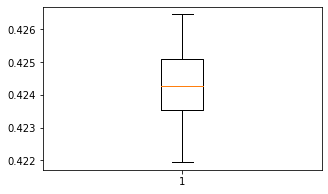

In [0]:
accuracy_lgb = []
log_loss_lgb = []

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)
    
x_train_lgb = x_train_sm.reset_index(drop=True)
y_train_lgb = y_train_sm.reset_index(drop=True)

for train_idx, test_idx in rkf.split(x_train_lgb, y_train_lgb):
    
    x_train_data_lgb, x_test_data_lgb = x_train_lgb.loc[train_idx], x_train_lgb.loc[test_idx]
    y_train_data_lgb, y_test_data_lgb = y_train_lgb.loc[train_idx], y_train_lgb.loc[test_idx]
    
    x_train_data_lgb = x_train_data_lgb.dropna()
    y_train_data_lgb = y_train_data_lgb.dropna()
    x_test_data_lgb = x_test_data_lgb.dropna()
    y_test_data_lgb = y_test_data_lgb.dropna()


    lgbm = LGBMClassifier(boosting='gbdt', objective='multiclass', num_class=38, 
           max_delta_step = 0.8, 
           min_data_in_leaf= 23,
           learning_rate= 0.4,
           max_bin= 465,
           num_leaves= 28,
           num_boost_round = 52).fit(x_train_data_lgb, y_train_data_lgb)
    
    accuracy_lgb.append(accuracy(lgbm.predict(x_test_data_lgb), y_test_data_lgb.values))
    log_loss_lgb.append(log_loss(y_test_data_lgb, lgbm.predict_proba(x_test_data_lgb)) )

accuracy_lgb = np.array(accuracy_lgb)/len(x_test_data_lgb)
print(accuracy_lgb)
plt.boxplot(accuracy_lgb)
plt.show()

[1.901108501157476, 1.903349919072265, 1.897607505861779, 1.8975461412985934, 1.900132665500477, 1.9005965898594372, 1.9009702123503092, 1.899016442136616, 1.9030543746540325, 1.8977566765044709, 1.9036038914338536, 1.8996263094211496, 1.900020668533849, 1.9001250374522343, 1.9048210238068461, 1.8972974429046532, 1.8997553741662707, 1.9002165386153151, 1.8983625975435023, 1.896715305784613, 1.8992708911467875, 1.8999095704044848, 1.8999514803323214, 1.8995168720768076, 1.9014657252623663, 1.89887191280704, 1.8957299215751144, 1.9024599538609288, 1.8998496484836749, 1.896661138353359, 1.8996940302614453, 1.9029986820509226, 1.8943817586519953, 1.9000418874346068, 1.8994240412007235, 1.9035202357237202, 1.8981946352715642, 1.9000704420041237, 1.898036894863252, 1.8983476834567075, 1.9030915216823314, 1.8961037289979976, 1.9018697552732695, 1.9009224232471507, 1.9021622771406497, 1.8990209008784218, 1.9012106610649604, 1.8988926719996484, 1.895617461258593, 1.8994180041754622]


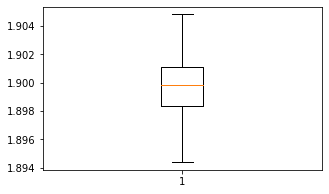

In [0]:
print(log_loss_lgb)
plt.boxplot(log_loss_lgb)
plt.show()

In [0]:
accuracy(lgbm.predict(x_test), y_test.values)/len(x_test)

In [0]:
log_loss(y_test, lgbm.predict_proba(x_test))